In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns

# Exploring the dataset with KNN. This algorithm is a non-linear classifier that uses the number of neighbours (points) to determine the class of every point in the dataset. So if an specific point is surrender by 3 points of class1 and 2 points of class2, the particular point will be predicted as class1

In [46]:
data = pd.read_csv('Social_Network_Ads.csv')

In [47]:
data.shape

(400, 5)

In [49]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


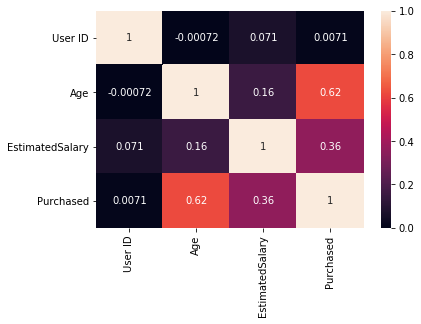

In [52]:
data_corr = data.corr()
sns.heatmap(data_corr, annot=True)
plt.show()

## The age is highly correlated with the purchase option. Obviously things like User ID has no impact in the prediction

In [12]:
X = data.iloc[:, 2:4].values
y = data.iloc[:, -1].values

In [13]:
scaler = StandardScaler()

In [14]:
X = scaler.fit_transform(X)

/anaconda3/envs/python-cvcourse/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python-cvcourse/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [45]:
KNN_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

## KNN with Euclidean distance is equal to (X2 - X1) squared + (Y2- Y1) squared . This is simply a distance of the length of a line. The algorithm is picked in p value

## Manhattan distance: SUM|Xi - Yi| - This formula relies in the coordinates

## KNN with 5 neighbours, computes for every point the nearerst 5 points

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [40]:
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [41]:
predictions = KNN_model.predict(X_test)

In [42]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

   micro avg       0.95      0.95      0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



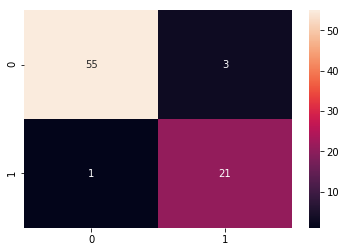

In [43]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)